In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("sales_data.csv")

In [3]:
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [171]:
#checking for missing values
data.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
profit                  0
dtype: int64

In [172]:
#converting to datetime format
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

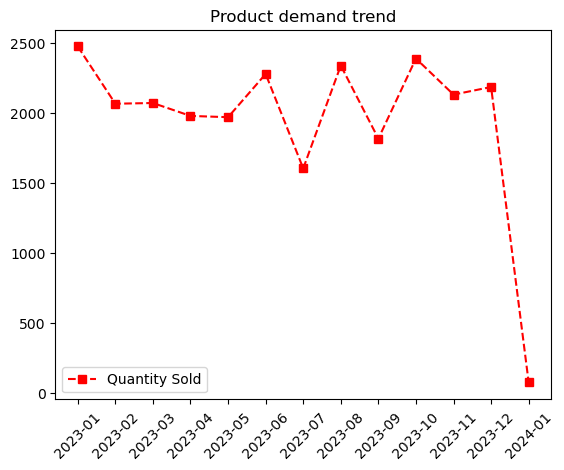

In [173]:



# Aggregate sales by month
df_grouped = data.groupby(data['Sale_Date'].dt.to_period('M'))['Quantity_Sold'].sum()


plt.plot(df_grouped.index.astype(str), df_grouped.values, marker='s', linestyle='--', label="Quantity Sold", color='r')
plt.legend()
plt.xticks(rotation=45)
plt.title("Product demand trend")
plt.show()



In [55]:
d_grou=data.groupby(data['Sale_Date'].dt.to_period('M'))['Sales_Amount'].sum()


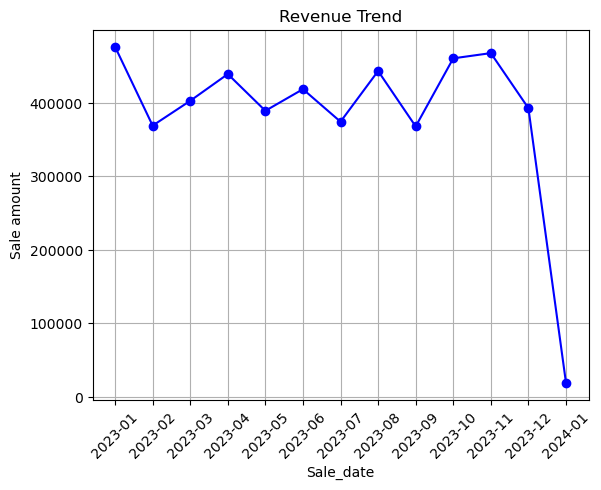

In [174]:
plt.plot(d_grou.index.astype(str),d_grou.values,marker='o',linestyle='-',color='b')
plt.xlabel('Sale_date')
plt.ylabel('Sale amount')
plt.title('Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [50]:
data['profit']=sum(data['Sales_Amount'])-sum(data['Unit_Cost'])

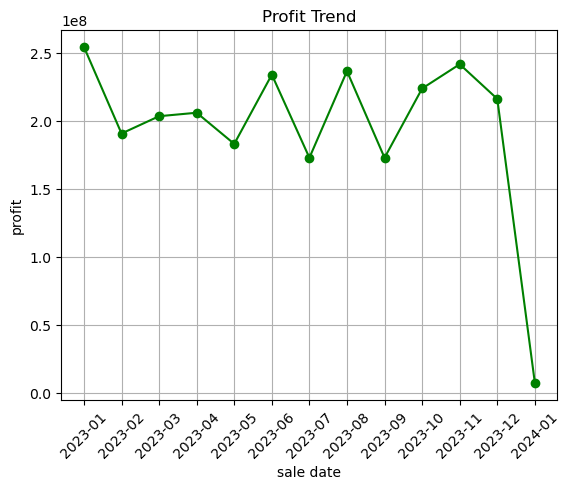

In [175]:
df_group=data.groupby(data['Sale_Date'].dt.to_period('M'))['profit'].sum()

plt.plot(df_group.index.astype(str),df_group.values,marker='o',linestyle='-',color='g')
plt.title('Profit Trend')
plt.xlabel('sale date')
plt.ylabel('profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Axes: xlabel='Customer_Type', ylabel='count'>

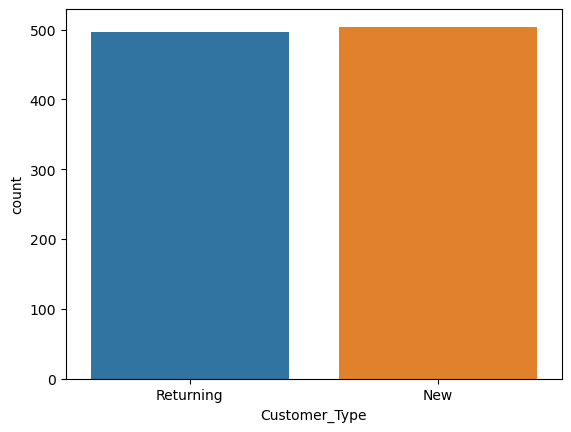

In [179]:
sns.countplot(x='Customer_Type',data=data)

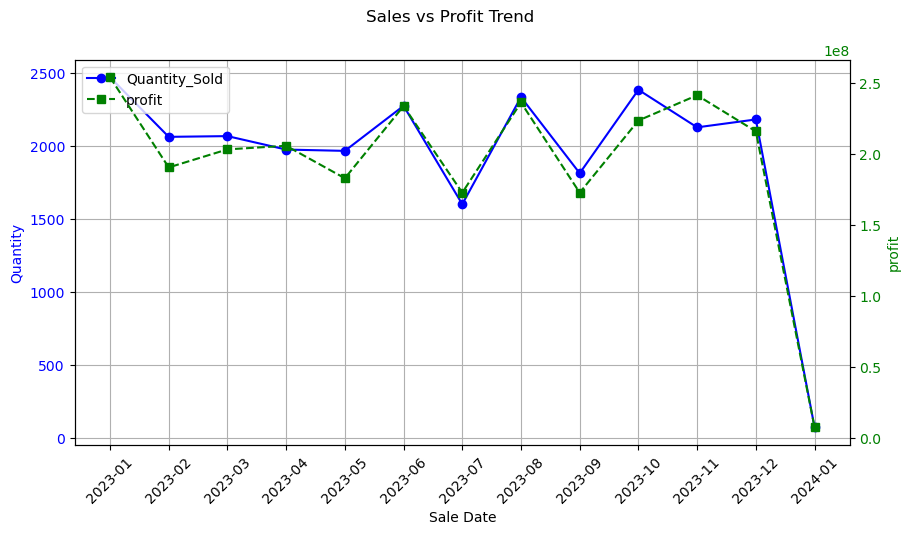

In [180]:


# Group by month and sum Sales_Amount & Profit
df = data.groupby(data['Sale_Date'].dt.to_period('M'))[['Quantity_Sold', 'profit']].sum()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Sales (Revenue) on primary y-axis
ax1.set_xlabel("Sale Date")
ax1.set_ylabel("Quantity", color='b')
line1, = ax1.plot(df.index.astype(str), df['Quantity_Sold'], marker='o', linestyle='-', label="Quantity_Sold", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis for Profit
ax2 = ax1.twinx()
ax2.set_ylabel("profit", color='g')
line2, = ax2.plot(df.index.astype(str), df['profit'], marker='s', linestyle='--', label="profit", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Fix the xticklabels issue
ax1.set_xticks(range(len(df.index)))  # Set correct tick positions
ax1.set_xticklabels(df.index.astype(str), rotation=45)

# Combine legends from both axes
lines = [line1, line2]  # Ensure `lines` is properly assigned
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

# Formatting
fig.suptitle("Sales vs Profit Trend")
ax1.grid()

plt.show()


<Axes: xlabel='Region', ylabel='Quantity_Sold'>

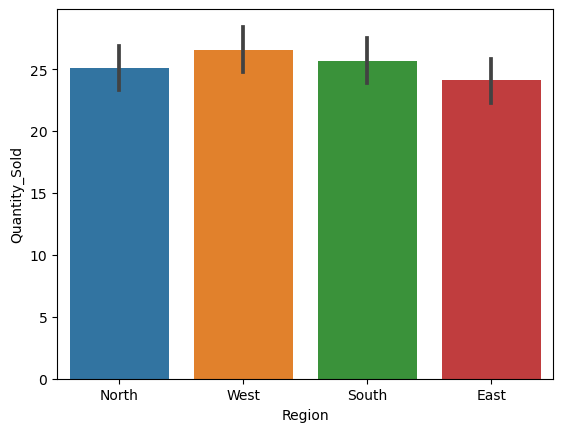

In [181]:
#finding which region brings in more sales
sns.barplot(x="Region",y="Quantity_Sold",data=data)

<Axes: xlabel='Sales_Channel', ylabel='count'>

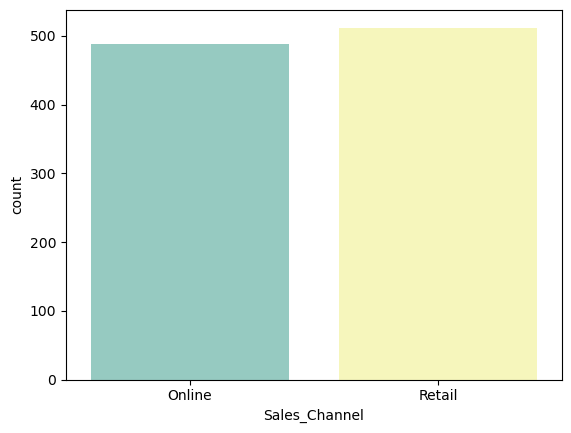

In [99]:
#checking which channel is most used
sns.countplot(x="Sales_Channel",data=data,palette="Set3")

In [104]:
revenue_by_channel=data.groupby(['Region','Sales_Channel'])['Sales_Amount'].sum().unstack()

In [105]:
revenue_by_channel['Top channel']=revenue_by_channel.idxmax(axis=1)
print(revenue_by_channel)

Sales_Channel     Online     Retail Top channel
Region                                         
East           575222.27  684570.66      Retail
North          683133.46  686479.05      Retail
South          590593.38  563657.48      Online
West           609884.82  625724.11      Retail


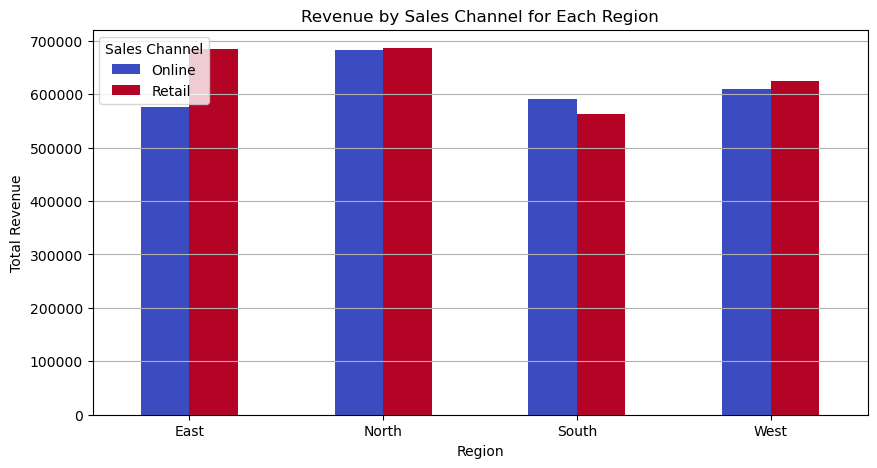

In [116]:
revenue_by_channel[['Online', 'Retail']].plot(kind='bar', figsize=(10,5), colormap='coolwarm')
plt.title("Revenue by Sales Channel for Each Region")
plt.ylabel("Total Revenue")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Sales Channel")
plt.grid(axis='y')

plt.show()


<Axes: xlabel='Product_Category', ylabel='Quantity_Sold'>

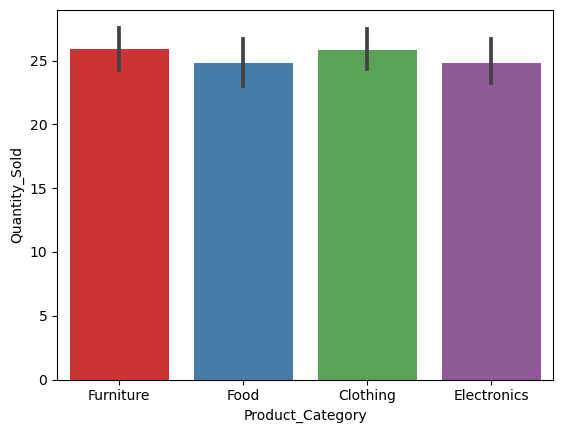

In [182]:
#which product category has the highest demand
sns.barplot(x="Product_Category",y="Quantity_Sold",data=data,palette='Set1')

In [130]:
#which product category has the highest discount
discount=data.groupby(data['Product_Category'])['Discount'].sum()

In [131]:
discount

Product_Category
Clothing       42.94
Electronics    33.58
Food           34.76
Furniture      41.11
Name: Discount, dtype: float64

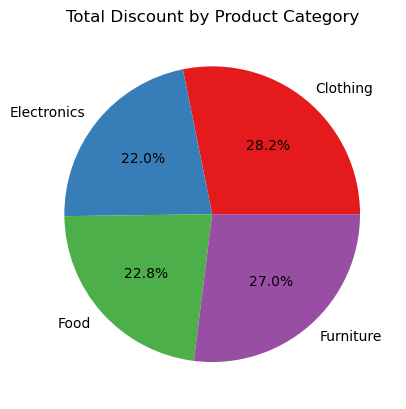

In [147]:
#visualizing product-discount

# Create the pie chart with correct colors
plt.pie(discount, labels=discount.index, colors=plt.get_cmap('Set1').colors[:len(discount)],autopct='%1.1f%%')

# Add a title
plt.title("Total Discount by Product Category")

# Show the plot
plt.show()


In [154]:
rep=data.groupby(data['Sales_Rep'])['Sale_Date'].count().sort_values(ascending=False)

In [155]:
#Which sales rep brings in most sales
rep

Sales_Rep
David      222
Eve        209
Bob        208
Alice      192
Charlie    169
Name: Sale_Date, dtype: int64

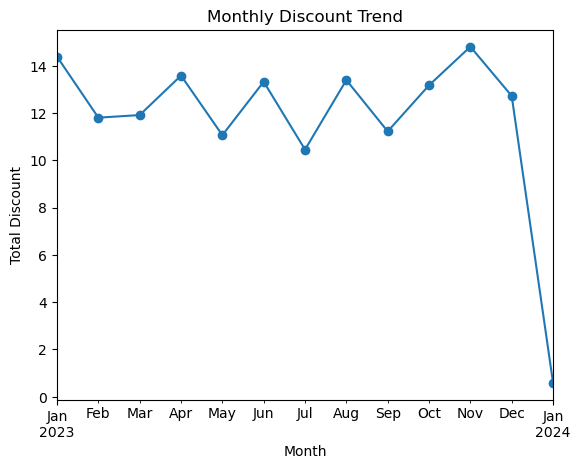

In [183]:
#visualizing monthly discount trend
data.groupby(data['Sale_Date'].dt.to_period('M'))['Discount'].sum().plot(kind='line', marker='o')
plt.title("Monthly Discount Trend")
plt.xlabel("Month")
plt.ylabel("Total Discount")
plt.show()


<Axes: >

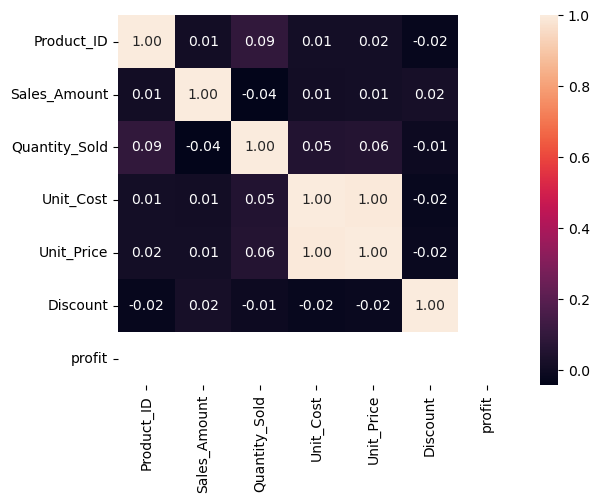

In [187]:

numeric=data.select_dtypes(include=['number'])
numeric.corr()
sns.heatmap(numeric.corr(),annot=True,fmt='.2f')

In [188]:
#which type of customer gets most discount
customer_discount = data.groupby('Customer_Type')['Discount'].mean()
print(customer_discount)


Customer_Type
New          0.151726
Returning    0.153065
Name: Discount, dtype: float64


In [170]:
#which 
payment_usage = data['Payment_Method'].value_counts()
print(payment_usage)


Payment_Method
Credit Card      345
Bank Transfer    342
Cash             313
Name: count, dtype: int64
